# Audi Price Predictions R^2 ~ 0.96

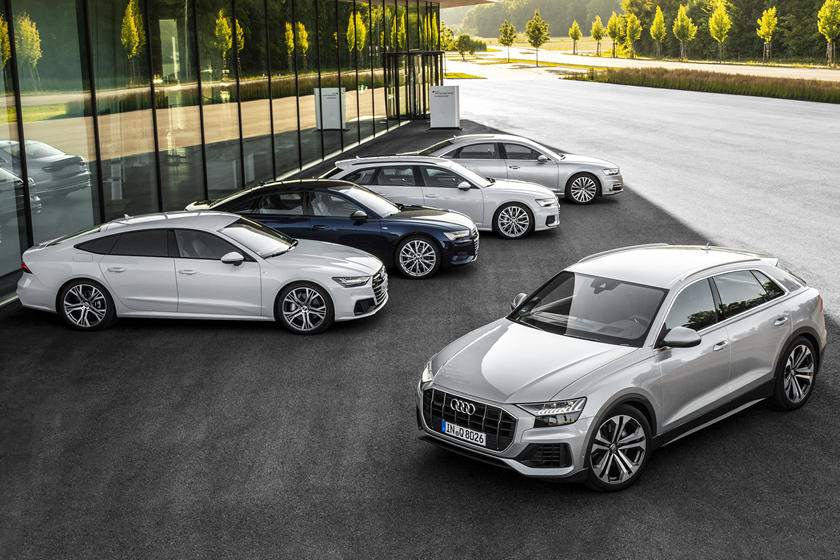

### hello kagglers, I have used many Regression models in this notebook inorder to find a best regression model out of it.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-dataset-ford-and-mercedes/vw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/bmw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/skoda.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/ford.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/toyota.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vauxhall.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/merc.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/audi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/hyundi.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

### reading the dataset using pandas

In [3]:
df_audi = pd.read_csv('../input/used-car-dataset-ford-and-mercedes/audi.csv')

In [4]:
df_audi.head()

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3    A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4    A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0

### To see how many unique types are there in each category columns,

In [5]:
print(df_audi['fuelType'].unique())
print(df_audi['transmission'].unique())
print(df_audi['model'].unique())

['Petrol' 'Diesel' 'Hybrid']
['Manual' 'Automatic' 'Semi-Auto']
[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']


### lets see if the columns in the dataset has some missing values

In [6]:
df_audi.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

### its good to say that there are no missing values in any of the columns in the datset

## EDA and Visualizations

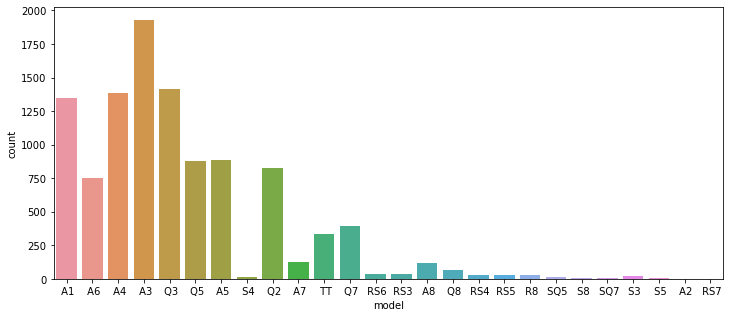

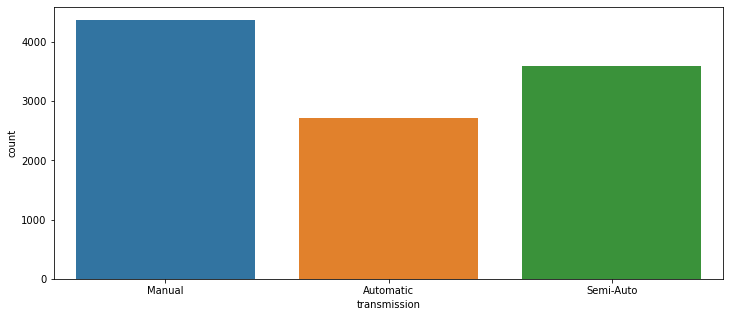

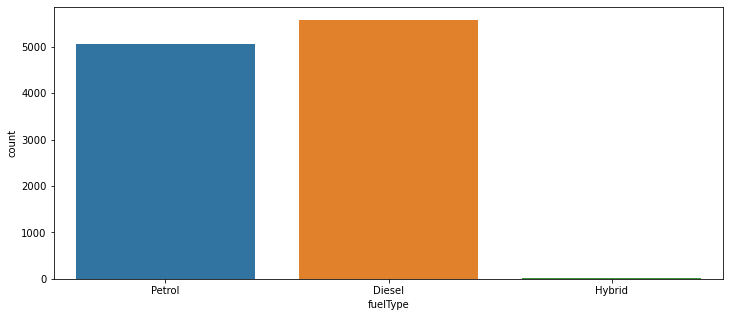

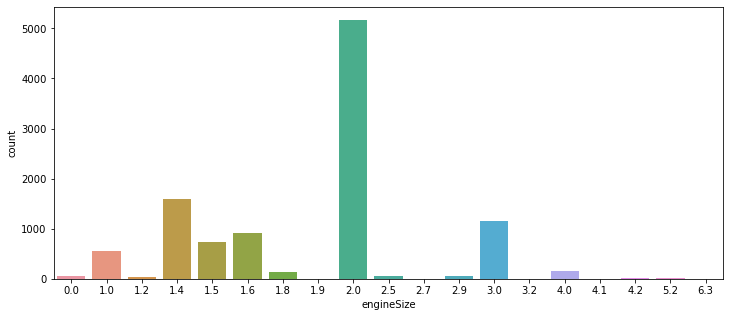

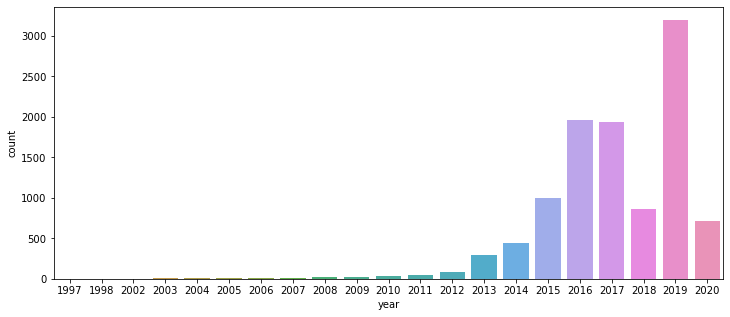

In [7]:
listy = ['model', 'transmission', 'fuelType', 'engineSize', 'year']
for i in listy:
    plt.figure(figsize=(12, 5))
    sns.countplot(df_audi[i])
    plt.show()

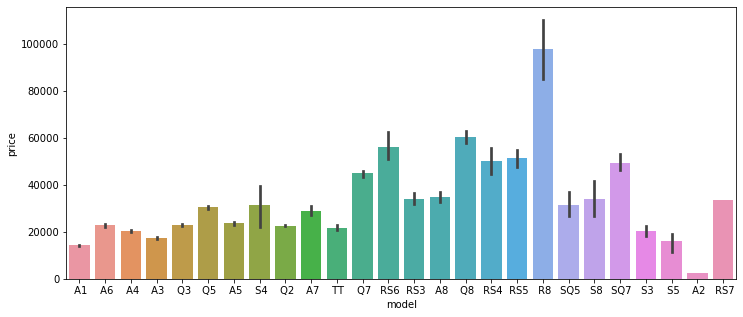

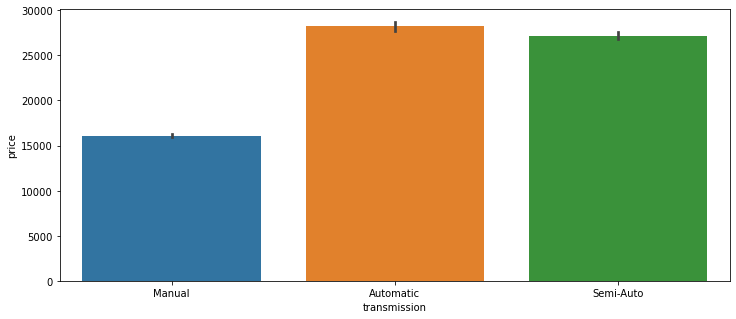

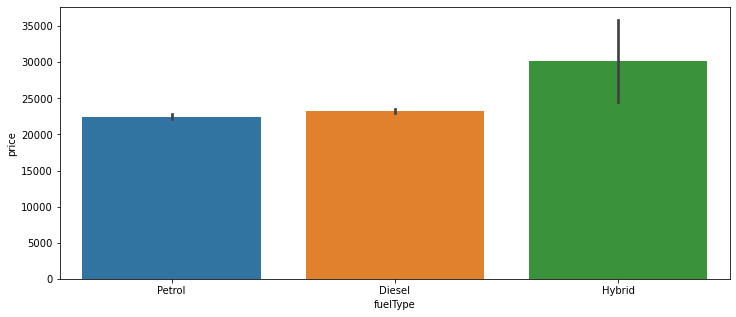

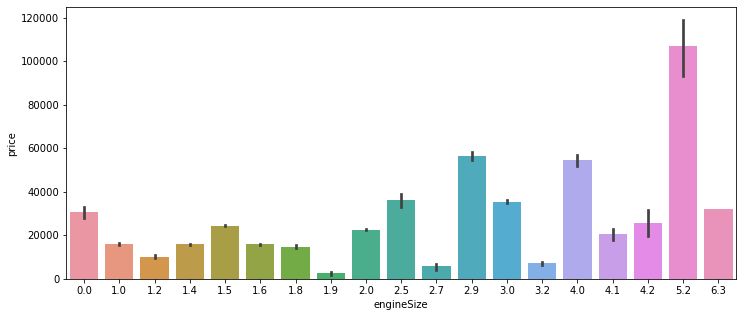

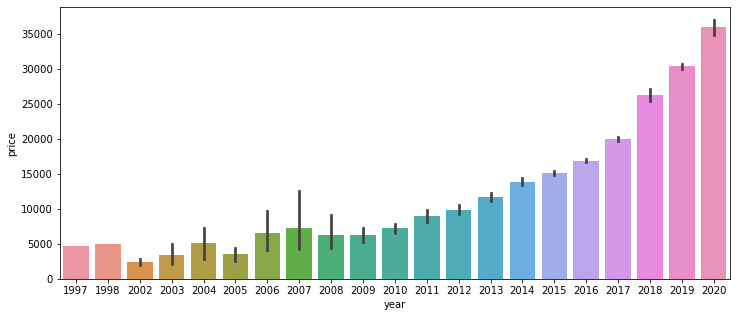

In [8]:
for i in listy:
    plt.figure(figsize=(12, 5))
    sns.barplot(x=df_audi[i], y=df_audi['price'])
    plt.show()

In [9]:
age_of_car = 2020 - df_audi['year']

In [10]:
df_audi.drop('year', axis=1, inplace=True)

In [11]:
df_audi['age_of_car'] = age_of_car

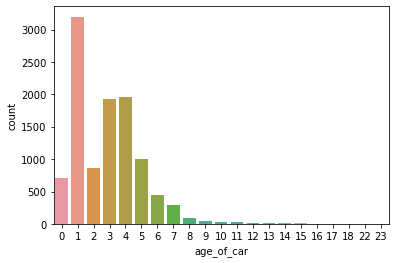

In [12]:
sns.countplot(df_audi['age_of_car'])

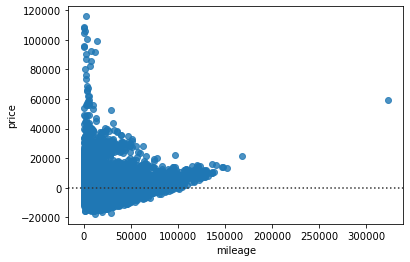

In [13]:
sns.residplot(df_audi['mileage'], df_audi['price'] )

## The above resid plot of price with respect to mileage is not  distributed all over . so it is a good fit for linear models

In [14]:
df_audi.corr()

price   mileage       tax       mpg  engineSize  age_of_car
price       1.000000 -0.535357  0.356157 -0.600334    0.591262   -0.592581
mileage    -0.535357  1.000000 -0.166547  0.395103    0.070710    0.789667
tax         0.356157 -0.166547  1.000000 -0.635909    0.393075   -0.093066
mpg        -0.600334  0.395103 -0.635909  1.000000   -0.365621    0.351281
engineSize  0.591262  0.070710  0.393075 -0.365621    1.000000    0.031582
age_of_car -0.592581  0.789667 -0.093066  0.351281    0.031582    1.000000

In [15]:
df_audi.head()

model  price transmission  mileage fuelType  tax   mpg  engineSize  \
0    A1  12500       Manual    15735   Petrol  150  55.4         1.4   
1    A6  16500    Automatic    36203   Diesel   20  64.2         2.0   
2    A1  11000       Manual    29946   Petrol   30  55.4         1.4   
3    A4  16800    Automatic    25952   Diesel  145  67.3         2.0   
4    A3  17300       Manual     1998   Petrol  145  49.6         1.0   

   age_of_car  
0           3  
1           4  
2           4  
3           3  
4           1

### using pd.dummies to transform categorical variables to numeric data, we can even use one hot encoding

In [16]:
df = pd.get_dummies(df_audi)

In [17]:
df.head()

price  mileage  tax   mpg  engineSize  age_of_car  model_ A1  model_ A2  \
0  12500    15735  150  55.4         1.4           3          1          0   
1  16500    36203   20  64.2         2.0           4          0          0   
2  11000    29946   30  55.4         1.4           4          1          0   
3  16800    25952  145  67.3         2.0           3          0          0   
4  17300     1998  145  49.6         1.0           1          0          0   

   model_ A3  model_ A4  ...  model_ S8  model_ SQ5  model_ SQ7  model_ TT  \
0          0          0  ...          0           0           0          0   
1          0          0  ...          0           0           0          0   
2          0          0  ...          0           0           0          0   
3          0          1  ...          0           0           0          0   
4          1          0  ...          0           0           0          0   

   transmission_Automatic  transmission_Manual  transmission_Semi-Auto  \
0                       0                    1                       0   
1                       1                    0                       0   
2                       0                    1                       0   
3                       1                    0                       0   
4                       0                    1                       0   

   fuelType_Diesel  fuelType_Hybrid  fuelType_Petrol  
0                0                0                1  
1                1                0                0  
2                0                0                1  
3                1                0                0  
4                0                0                1  

[5 rows x 38 columns]

In [18]:
df.shape

(10668, 38)

### Model Developement & evaluation

### training and testing data

In [19]:
x = df.drop('price', axis=1)
y = df['price']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [21]:
def plot(a, title):
    plt.figure(figsize=(8, 5))
    sns.distplot(a, hist=False, color='r', label='predicted')
    sns.distplot(y_test, hist=False, color='b', label='actual')
    plt.title(title)
    plt.show()

## Linear Regression

In [22]:
lr = LinearRegression()
Input1 = [('scale', StandardScaler()), ('model', lr)]
pipe1 = Pipeline(Input1)
pipe1.fit(x_train, y_train)
yhat1 = pipe1.predict(x_test)

In [23]:
lr_score = r2_score(yhat1, y_test)
print('The r^2 score for Linear Regression is {}'.format(lr_score))
print('The mean absolute error is {}'.format(np.mean(np.absolute(yhat1-y_test))))
print('Residual sum of squares : {}'.format(np.mean(yhat1-y_test)**2))    

The r^2 score for Linear Regression is 0.8821091245716111
The mean absolute error is 2646.3717948692497
Residual sum of squares : 209.19854823265305


### lets see how well the model predicts with the fitted model

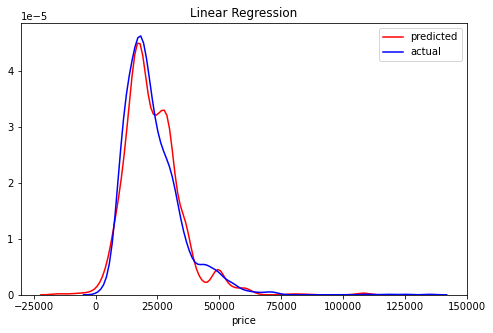

In [24]:
plot(yhat1, 'Linear Regression')

## XGBRegressor

In [25]:
model = XGBRegressor(random_state=2)
model.fit(x_train, y_train)
yhat2 = model.predict(x_test)

In [26]:
xgb_score = r2_score(yhat2, y_test)
print('The r^2 score for XGBRegressor is {}'.format(xgb_score))
print('The mean absolute error is {}'.format(np.mean(np.absolute(yhat2-y_test))))
print('Residual sum of squares : {}'.format(np.mean(yhat2-y_test)**2))  

The r^2 score for XGBRegressor is 0.9604800722563156
The mean absolute error is 1465.8821876189813
Residual sum of squares : 3468.678549589502


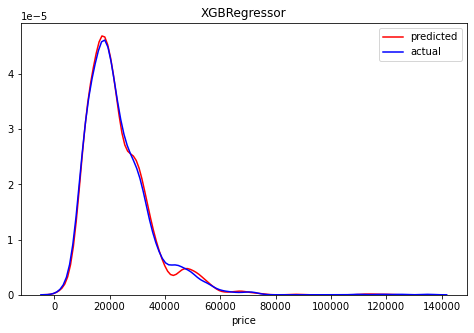

In [27]:
plot(yhat2, 'XGBRegressor')

## Random Forest Regressor

In [28]:
pipe2 = Pipeline([('preprocessor', SimpleImputer()), ('model', RandomForestRegressor(n_estimators= 1000, random_state=0))])
score = -1*cross_val_score(pipe2, x_train, y_train , cv=5, scoring='neg_mean_absolute_error')
print('cross_val_score of Random Forest Regressor is {}'.format(score.mean()))
pipe2.fit(x_train, y_train)
yhat3 = pipe2.predict(x_test)

cross_val_score of Random Forest Regressor is 1561.8386300764917


In [29]:
rfr_score = r2_score(yhat3, y_test)
print('The r^2 score for Random Forest Regressor is {}'.format(rfr_score))
print('The mean absolute error is {}'.format(np.mean(np.absolute(yhat3-y_test))))
print('Residual sum of squares : {}'.format(np.mean(yhat3-y_test)**2))  

The r^2 score for Random Forest Regressor is 0.9557739190132962
The mean absolute error is 1500.8295116870045
Residual sum of squares : 14507.473052518946


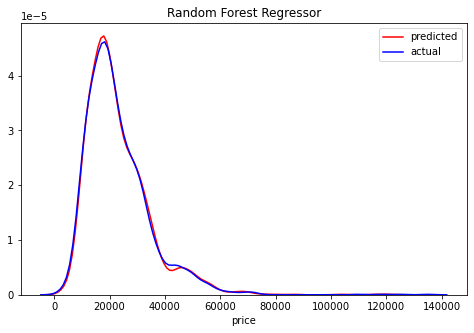

In [30]:
plot(yhat3, 'Random Forest Regressor')

## Decision Tree Regressor

In [31]:
audi_tree = DecisionTreeRegressor(random_state=1)
audi_tree.fit(x_train, y_train)
yhat4 = audi_tree.predict(x_test)

In [32]:
dtr_score = r2_score(yhat4, y_test)
print('The r^2 score for Decision Tree classifier is {}'.format(dtr_score))
print('The mean absolute error is {}'.format(np.mean(np.absolute(yhat4-y_test))))
print('Residual sum of squares : {}'.format(np.mean(yhat4-y_test)**2))  

The r^2 score for Decision Tree classifier is 0.9143695441641028
The mean absolute error is 1945.5036316776004
Residual sum of squares : 4465.290449301725


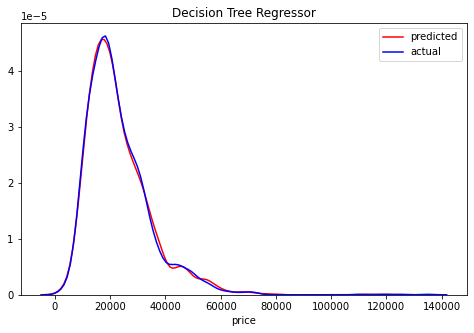

In [33]:
plot(yhat4, 'Decision Tree Regressor')

## Ridge Regression

### using grid search to find out which alpha value has high score for ridge regression

In [34]:
parameter = [{'alpha': [0.001, 0.1, 0.4, 10, 100, 1000, 10000, 100000]}]
rr = Ridge()
grid1 = GridSearchCV(rr, parameter, cv=4)
grid1.fit(x_train, y_train)
grid1.best_estimator_
scores = grid1.cv_results_
scores['mean_test_score']

array([0.88724293, 0.88726935, 0.88728035, 0.8756143 , 0.82616106,
       0.76211799, 0.60933219, 0.48596696])

In [35]:
ridge_model = Ridge(alpha=0.4)
ridge_model.fit(x_train, y_train)
yhat5 = ridge_model.predict(x_test)

In [36]:
ridge_score = r2_score(yhat5, y_test)
print('The r^2 score for Ridge Regression is {}'.format(ridge_score))
print('The mean absolute error is {}'.format(np.mean(np.absolute(yhat5-y_test))))
print('Residual sum of squares : {}'.format(np.mean(yhat5-y_test)**2))  

The r^2 score for Ridge Regression is 0.8818514430898788
The mean absolute error is 2647.0439143310055
Residual sum of squares : 320.72776010954504


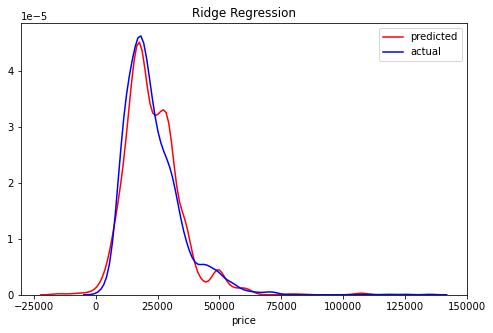

In [37]:
plot(yhat5, 'Ridge Regression')

## Lasso Regression

In [38]:
lasso_model = Lasso(alpha=0.4)
lasso_model.fit(x_train, y_train)
yhat6 = lasso_model.predict(x_test)

In [39]:
lasso_score = r2_score(yhat6, y_test)
print('The r^2 score for Lasso Regression is {}'.format(lasso_score))
print('The mean absolute error is {}'.format(np.mean(np.absolute(yhat6-y_test))))
print('Residual sum of squares : {}'.format(np.mean(yhat6-y_test)**2))  

The r^2 score for Lasso Regression is 0.8821919467839864
The mean absolute error is 2644.291045618477
Residual sum of squares : 307.7812401642254


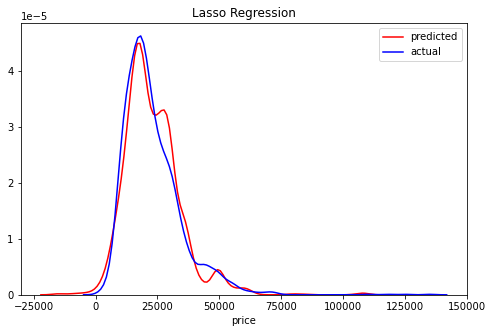

In [40]:
plot(yhat6, 'Lasso Regression')

## Bayesian Regression

In [41]:
bay_ridge_model = BayesianRidge()
bay_ridge_model.fit(x_train, y_train)
yhat7 = bay_ridge_model.predict(x_test)

In [42]:
bay_ridge_score = r2_score(yhat7, y_test)
print('The r^2 score for bayesian Ridge Regression is {}'.format(bay_ridge_score))
print('The mean absolute error is {}'.format(np.mean(np.absolute(yhat7-y_test))))
print('Residual sum of squares : {}'.format(np.mean(yhat7-y_test)**2))  

The r^2 score for bayesian Ridge Regression is 0.8820414274192603
The mean absolute error is 2646.10703131618
Residual sum of squares : 253.96562268786758


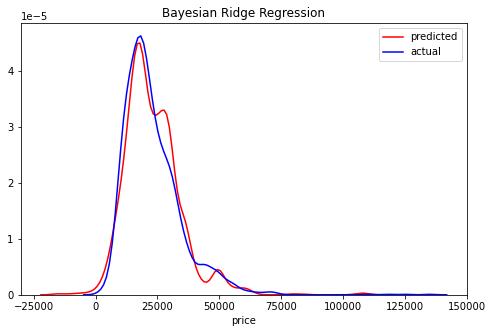

In [43]:
plot(yhat7, 'Bayesian Ridge Regression')

### using polynomial features to check if the model predicts better

### applying polynomial degree =2

In [44]:
poly = PolynomialFeatures(degree=2)
x_train_pr = poly.fit_transform(x_train)
x_test_pr = poly.fit_transform(x_test)

In [45]:
listy2 = [LinearRegression(),XGBRegressor(n_estimators=1000, learning_rate=0.06, random_state=3, n_jobs=2),
         BayesianRidge(),Lasso(alpha=0.4),Ridge(alpha=0.4) , DecisionTreeRegressor(random_state=1),
          RandomForestRegressor(n_estimators= 1000, random_state=0)]
listy_title = ['Linear Regression', 'XGBRegressor', 'bayesian Ridge', 'Lasso', 'Ridge', 'DecisionTreeRegressor',
              'Random Forest Regressor']

In [46]:
poly_score=[]
for regr, title in zip(listy2, listy_title):
    model = regr
    model.fit(x_train_pr, y_train)
    yhat = model.predict(x_test_pr)
    rs = r2_score(yhat, y_test)
    poly_score.append(rs)
    print('The r^2 score of {} is {}'.format(title, rs))

The r^2 score of Linear Regression is 0.8827998142191371
The r^2 score of XGBRegressor is 0.955462741870232
The r^2 score of bayesian Ridge is 0.9360891761362417
The r^2 score of Lasso is 0.9346157161960307
The r^2 score of Ridge is 0.927512065141458
The r^2 score of DecisionTreeRegressor is 0.9105566765440721
The r^2 score of Random Forest Regressor is 0.9408636495631661


In [47]:
score = pd.DataFrame({
    'models': listy_title,
    'normal r^2 score': [lr_score, xgb_score, bay_ridge_score,
                         lasso_score, ridge_score,  dtr_score, rfr_score],
    'poly r^2 score': poly_score
})
score

models  normal r^2 score  poly r^2 score
0        Linear Regression          0.882109        0.882800
1             XGBRegressor          0.960480        0.955463
2           bayesian Ridge          0.882041        0.936089
3                    Lasso          0.882192        0.934616
4                    Ridge          0.881851        0.927512
5    DecisionTreeRegressor          0.914370        0.910557
6  Random Forest Regressor          0.955774        0.940864

## from the r^2 scores XGBRegressor ~0.96 is the best model for prediction, even other models too has r^2 score greater than 0.90

## upvoting is a way of appreciation
## if you like it, do upvote üëç